**Linear classification of iris dataset mainly setosa and versicolour using SVM classifier** 

Let's import relevant libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now let's import the dataset

In [51]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


1) Loading the first two features { 'sepal length' and 'sepal width'}

2) loading the target

The first two classes of iris dataset: Setosa (0) and versicolour (1)

In [52]:
X_w = iris.data[:, :2]
y_w = iris.target

In [53]:
X = X_w[y_w < 2]
y = y_w[y_w < 2]

**Plot the classes 0 and 1 with matplotlib**

X[:, 0] $\rightarrow$ column 1 ('sepal length')

X[:, 1] $\rightarrow$ column 1 ('sepal width')

[]

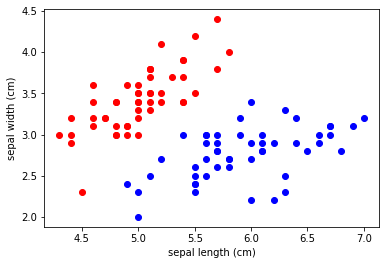

In [54]:
X_0 = X[y == 0]
X_1 = X[y == 1]
%matplotlib inline
plt.figure(figsize=(6,4))
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(X_0[:,0], X_0[:,1], color='Red')
plt.scatter(X_1[:,0], X_1[:,1], color='Blue')
plt.plot()

**Split our dataset into training (80 %) and testing datasets (20 %) and stratify the dataset**

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 7, stratify= y)

**Let's import Support Vector Classification (SVC)**

In [56]:
from sklearn.svm import SVC

**Our model instance is linear and we have added a high penalty for misclassification**

In [57]:
svm_inst = SVC(kernel = 'linear', C = 100)

Let's fit the data

In [58]:
svm_inst.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Calculating the parameters for plotting the hyperplane and support vectors

In [59]:
w = svm_inst.coef_[0]
print(w)
a = -(w[0]/w[1])
c = svm_inst.intercept_

[ 6.3145101  -5.26141839]


[]

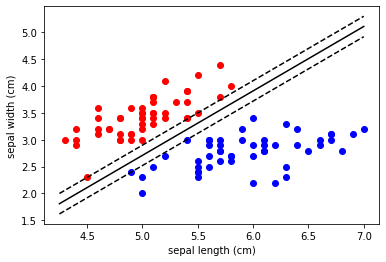

In [60]:
xx = np.linspace(4.25,7)
yy = a * xx - c/w[1]
yy_up = a * xx - (c - 1)/w[1]
yy_down = a * xx - (c + 1)/w[1]
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(X_0[:,0], X_0[:,1], color='Red')
plt.scatter(X_1[:,0], X_1[:,1], color='Blue')
plt.plot(xx, yy, 'k')
plt.plot(xx, yy_up, '--k')
plt.plot(xx, yy_down, '--k')
plt.plot()

**Calculating the accuracy score**

predicting for test datasets

In [61]:
y_pred = svm_inst.predict(X_test)

import accuracy score metrics

In [62]:
from sklearn.metrics import accuracy_score

predicting the accuracy score for our model

In [63]:
print(accuracy_score(y_test, y_pred))

1.0


**Let's visualize the decision boundary, the line separating the classes, by using the estimator on a two-dimensional grid**

In [64]:
from itertools import product

In [65]:
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

In [66]:
test_points = np.array([[xx,yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

In [67]:
test_preds = svm_inst.predict(test_points)

[]

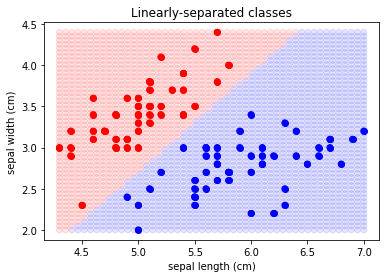

In [68]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(X_0[:,0], X_0[:,1], color='Red')
plt.scatter(X_1[:,0], X_1[:,1], color='Blue')
colors = np.array(['r', 'b'])
plt.scatter(test_points[:, 0], test_points[:, 1],
color=colors[test_preds], alpha=0.10)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Linearly-separated classes")
plt.plot()